In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('Flight_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train.shape

(10683, 11)

The data set has 10683 rows and 11 columns.

In [4]:
#Checking the datatypes
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The data set has data types Integer and Object.

The columns Date_of_journey,Dep_time,Arrival_Time and Duration is in object data type, need to convert into datetime.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The data set has 10682 rows and 11 columns.

All columns has 10683 non-null values except Route and Total_Stops.

In [6]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#Checking null values present in the dataset.
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Null values present in the columns Route and Total_Stops.

In [8]:
#Removing the null values.
train=train.dropna()
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Date_of_Journey is object need to convert to datetime

train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])
train['Day of Journey']=train['Date_of_Journey'].apply(lambda x:x.day)
train['Month of Journey']=train['Date_of_Journey'].apply(lambda x:x.month)
train['Year of Journey']=train['Date_of_Journey'].apply(lambda x:x.year)

In [10]:
#Converting the Dep_Time from object to datetime.
train['Dep_Time']=pd.to_datetime(train['Dep_Time'])
train['Dep-Hour']=train['Dep_Time'].apply(lambda x:x.hour)
train['Dep-Minute']=train['Dep_Time'].apply(lambda x:x.minute)

In [11]:
#Converting the Arrival_Time from object to datetime.
train['Arrival_Time']=pd.to_datetime(train['Arrival_Time'])
train['Arrival-Hour']=train['Arrival_Time'].apply(lambda x:x.hour)
train['Arrival-Minute']=train['Arrival_Time'].apply(lambda x:x.minute)

In [12]:
#Checking the unique number in Total_Stops
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [13]:
#Replacing the values in Total_Stops
train['Total_Stops']=train['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [14]:
#Seperating Duration_hour and Duration_minute from Duration

Duration=list(train['Duration'])

Duration_hour=[]
Duration_minute=[]
for i in range(len(Duration)):
    if len(Duration[i].split()) !=2:
        if 'h' in Duration[i]:
            Duration[i]=Duration[i].strip() + ' 0m'
        else:
            Duration[i]='0h' +Duration[i]
        
for i in range(len(Duration)):
    Duration_hour.append(int(Duration[i].split('h')[0]))
    Duration_minute.append(int(Duration[i].split('m')[0].split('h')[-1]))
        

In [15]:
#Adding Duration_hour and Duration_minute.
train['Duration Hours']=Duration_hour
train['Duration Minute']=Duration_minute

In [16]:
#Removing Date_of_Journey,Dep_Time,Arrival_Time and Duration
train=train.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

In [17]:
#Route and Total_Stops are similar, so removing one of them. There is only one year in the Year of Jouney,so removing that also.
train=train.drop(['Route','Year of Journey'],axis=1)
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:>

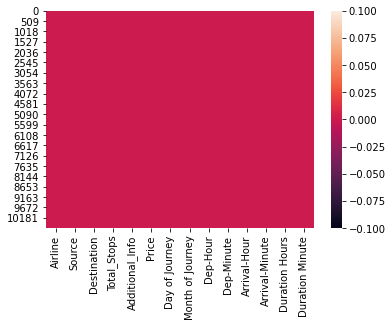

In [18]:
sns.heatmap(train.isnull())

<AxesSubplot:>

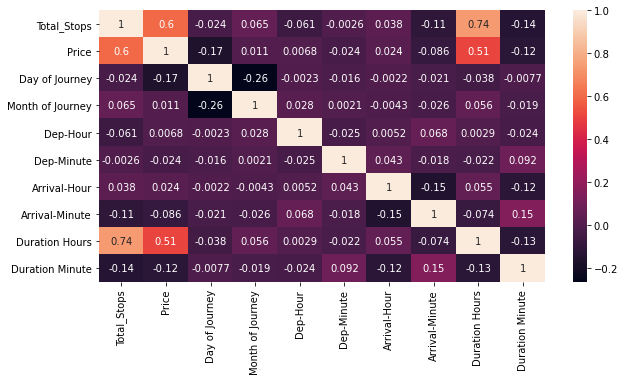

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)

Total_Stops and Price is highly positive correlated.

Duration Hours and Total_Stops is highly positive correlated.

Price and Duration Hours is positive correlated.

The Price is positively correlated to Total_Stops,Month of Journey,Dep-Hour,Arrival-Hour and Duration Hours. The Price negatively correlated to Day of Journey,Dep-Minute,Arrival-Minute and Duration Minute.

# Data Visualization

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

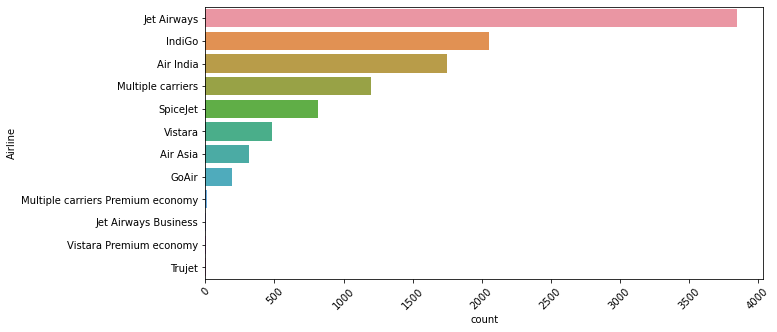

In [20]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='45')
sns.countplot(y='Airline',data=train,order=train['Airline'].value_counts().sort_values(ascending=False).index)
train['Airline'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

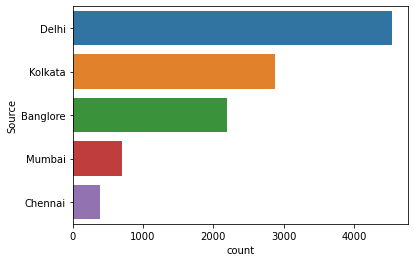

In [21]:
sns.countplot(y='Source',data=train,order=train['Source'].value_counts().sort_values(ascending=False).index)
train['Source'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

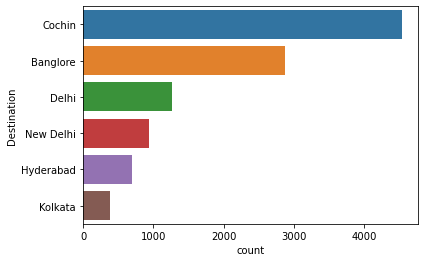

In [22]:
sns.countplot(y='Destination',data=train,order=train['Destination'].value_counts().sort_values(ascending=False).index,)
train['Destination'].value_counts()

<AxesSubplot:xlabel='Airline', ylabel='Price'>

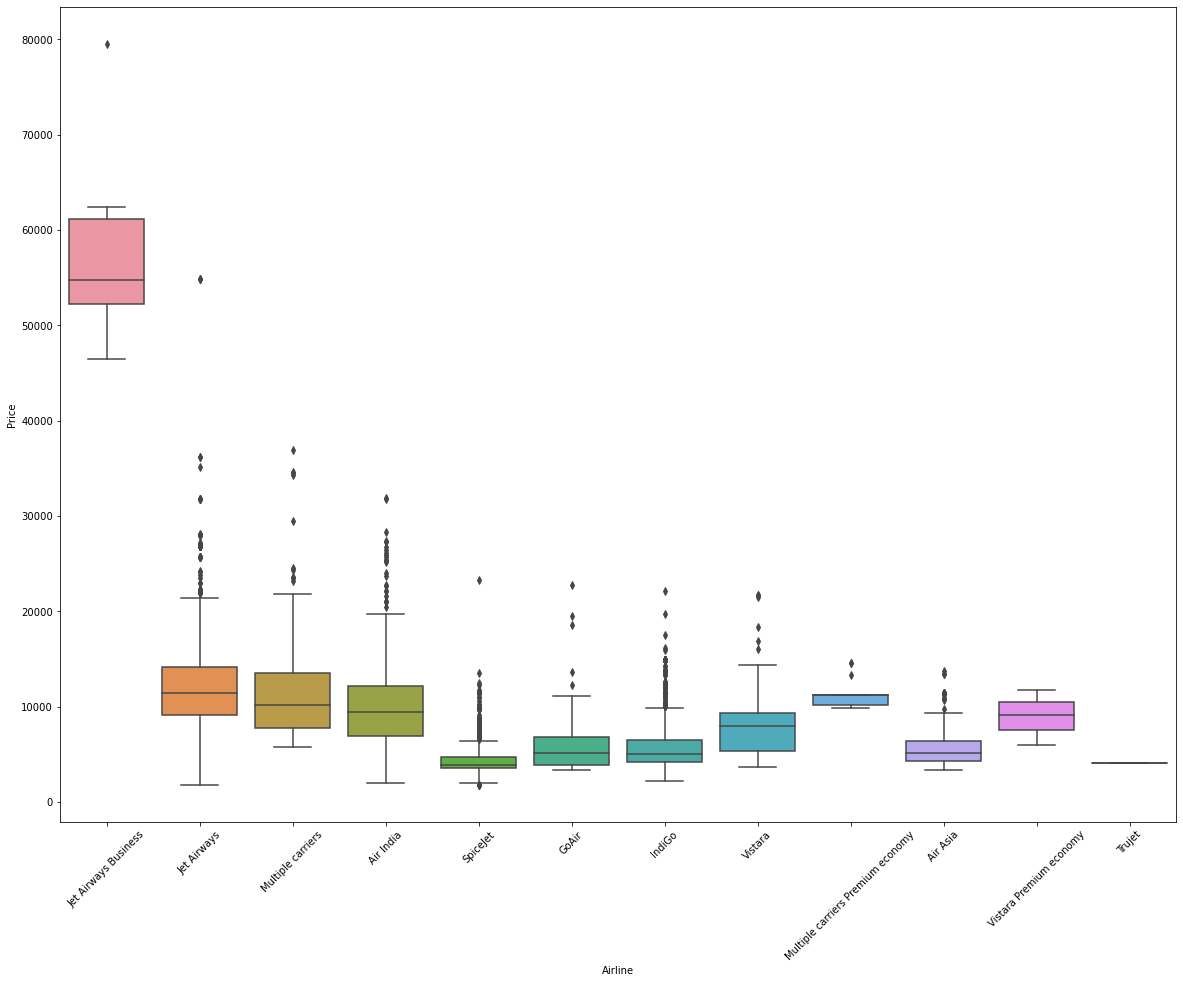

In [23]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='45')
sns.boxplot(x='Airline',y='Price',data=train.sort_values('Price',ascending=False))

Jet Airways Business has the highest Price compared to others.

Outliers present in Jet Airways,Multiple Carriers,AirIndia,SpiceJet,GoAir,IndiGo,Vistara,Multiple Carriers Premium economy and Air Asia.

<AxesSubplot:xlabel='Source', ylabel='Price'>

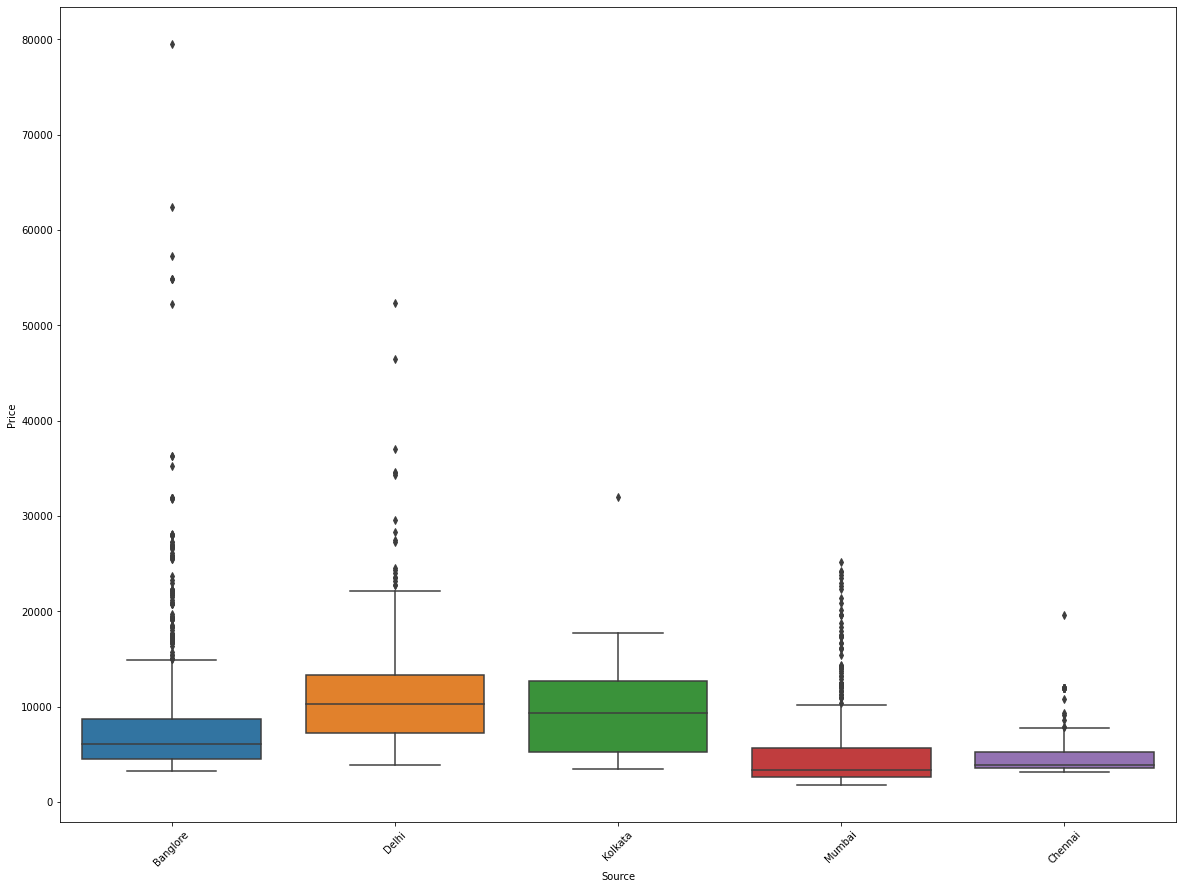

In [24]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='45')
sns.boxplot(x='Source',y='Price',data=train.sort_values('Price',ascending=False))

The Price is higher in Delhi and Kolkata compared to Banglore,Mumbai and Chennai.

Outliers are present in Banglore,Delhi,Mumbai and Chennai.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

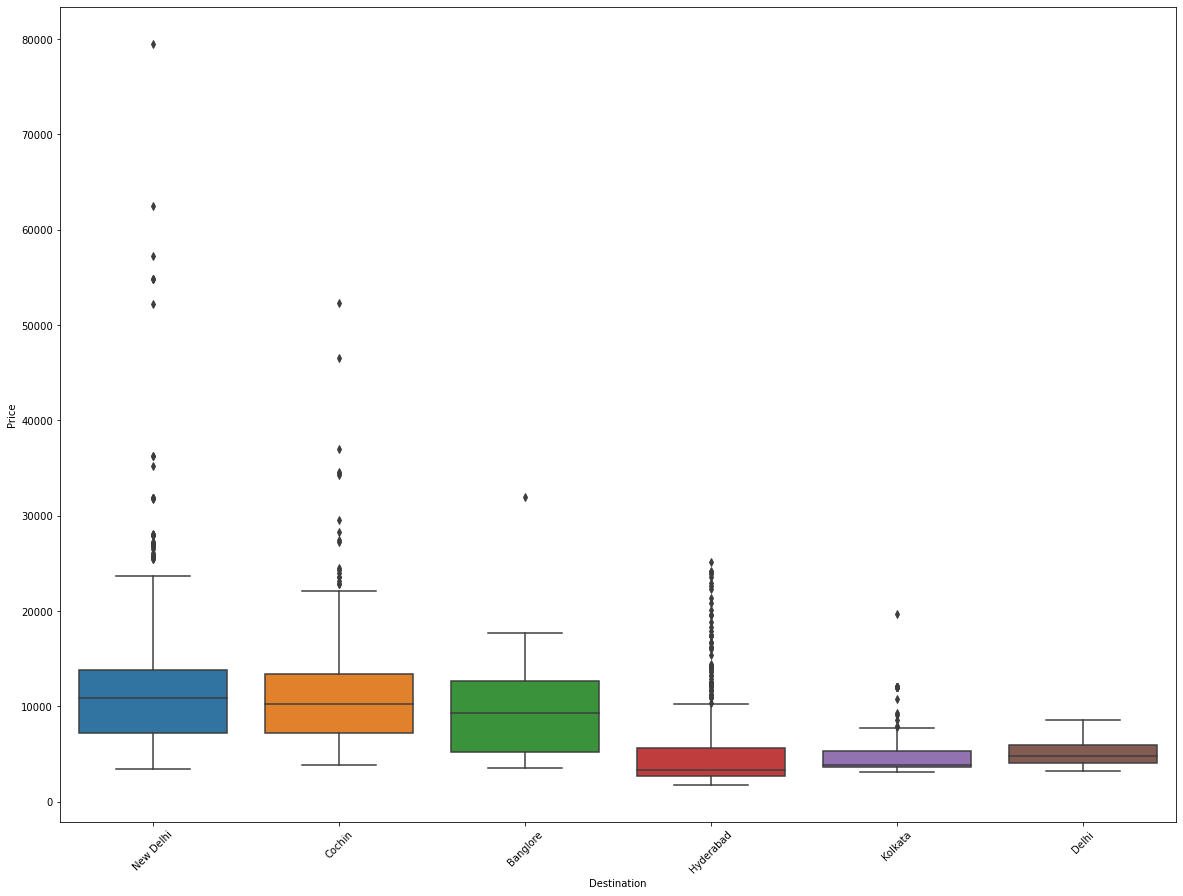

In [25]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='45')
sns.boxplot(x='Destination',y='Price',data=train.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Airline', ylabel='Price'>

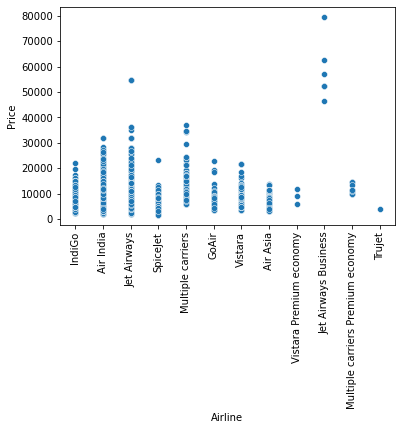

In [26]:
plt.xticks(rotation='90')
sns.scatterplot('Airline','Price',data=train)

Jet Airways Business price is ranging from 45000 to 80000.

Air India,Jet Airways and Multiple Carriers price similar.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

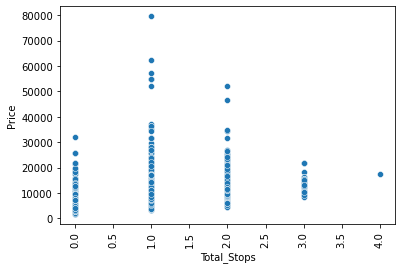

In [27]:
plt.xticks(rotation='90')
sns.scatterplot('Total_Stops','Price',data=train)

Price is higher with one and two stops.But less price with no stops,3 stops and 4 stops.

<AxesSubplot:xlabel='Duration Hours', ylabel='Price'>

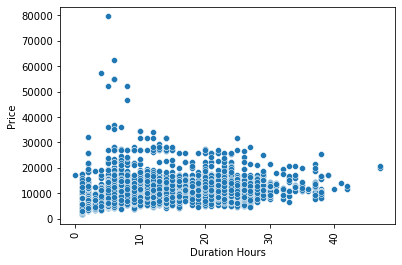

In [28]:
plt.xticks(rotation='90')
sns.scatterplot('Duration Hours','Price',data=train)

<AxesSubplot:xlabel='Duration Hours', ylabel='Total_Stops'>

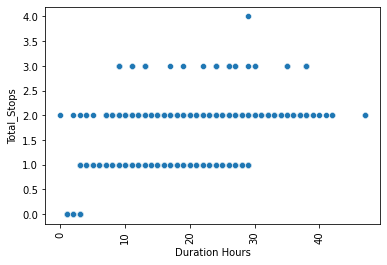

In [29]:
plt.xticks(rotation='90')
sns.scatterplot('Duration Hours','Total_Stops',data=train)

In [30]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


In [31]:
con=train[['Total_Stops','Price','Day of Journey','Month of Journey','Dep-Hour','Dep-Minute','Arrival-Hour','Arrival-Minute','Duration Hours','Duration Minute']]

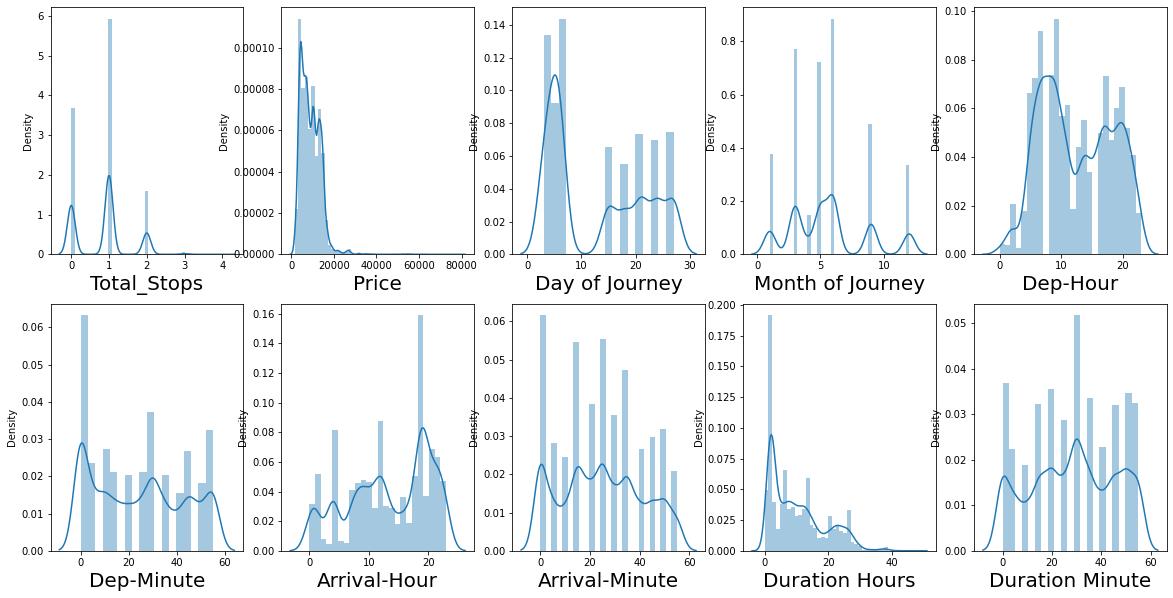

In [32]:
plt.figure(figsize=(20,10))
plotnumber=1

for i in con:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()


In [33]:
#Checking the skewness
train.skew()

Total_Stops         0.317109
Price               1.812405
Day of Journey      0.367212
Month of Journey    0.629556
Dep-Hour            0.112924
Dep-Minute          0.167234
Arrival-Hour       -0.370146
Arrival-Minute      0.110945
Duration Hours      0.851197
Duration Minute    -0.090680
dtype: float64

Skewness is not present 

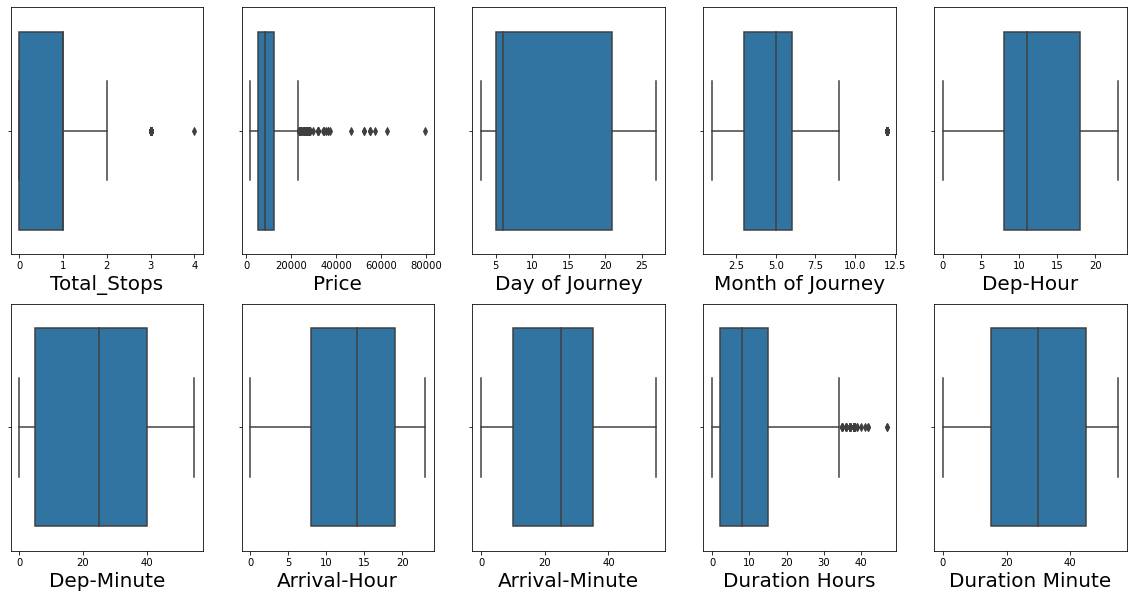

In [34]:
plt.figure(figsize=(20,10))
plotnumber=1

for i in con:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in Total_Stops,Price and Duration Hours

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

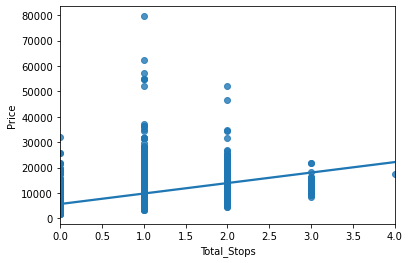

In [35]:
sns.regplot('Total_Stops','Price',data=train)

Price and Total_Stops has positive linear relation

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration Hours'>

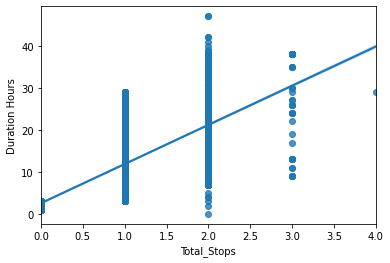

In [36]:
sns.regplot('Total_Stops','Duration Hours',data=train)

Duration Hours and Total_Stops has a positive linear relation.

<AxesSubplot:xlabel='Price', ylabel='Duration Hours'>

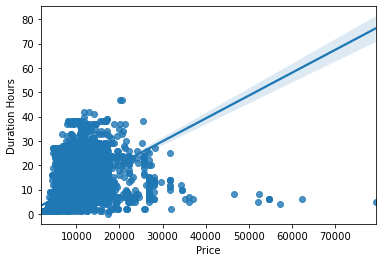

In [37]:
sns.regplot('Price','Duration Hours',data=train)

Price and Duration Hours has a positive linear relation

<AxesSubplot:xlabel='Price', ylabel='Day of Journey'>

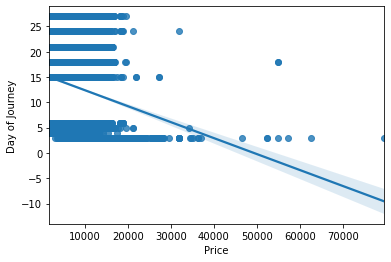

In [38]:
sns.regplot('Price','Day of Journey',data=train)

Price and Day of Journey has a negative linear relation.

<AxesSubplot:xlabel='Price', ylabel='Month of Journey'>

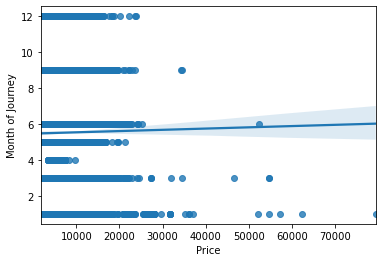

In [39]:
sns.regplot('Price','Month of Journey',data=train)

Price and Month of Journey has a weak relation.

<AxesSubplot:xlabel='Price', ylabel='Arrival-Hour'>

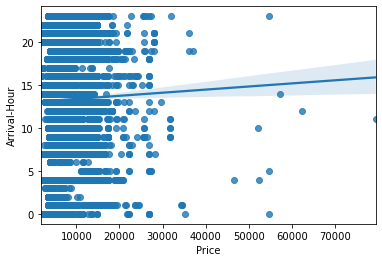

In [40]:
sns.regplot('Price','Arrival-Hour',data=train)

Price and Arrival-Hour has a positive linear relation.

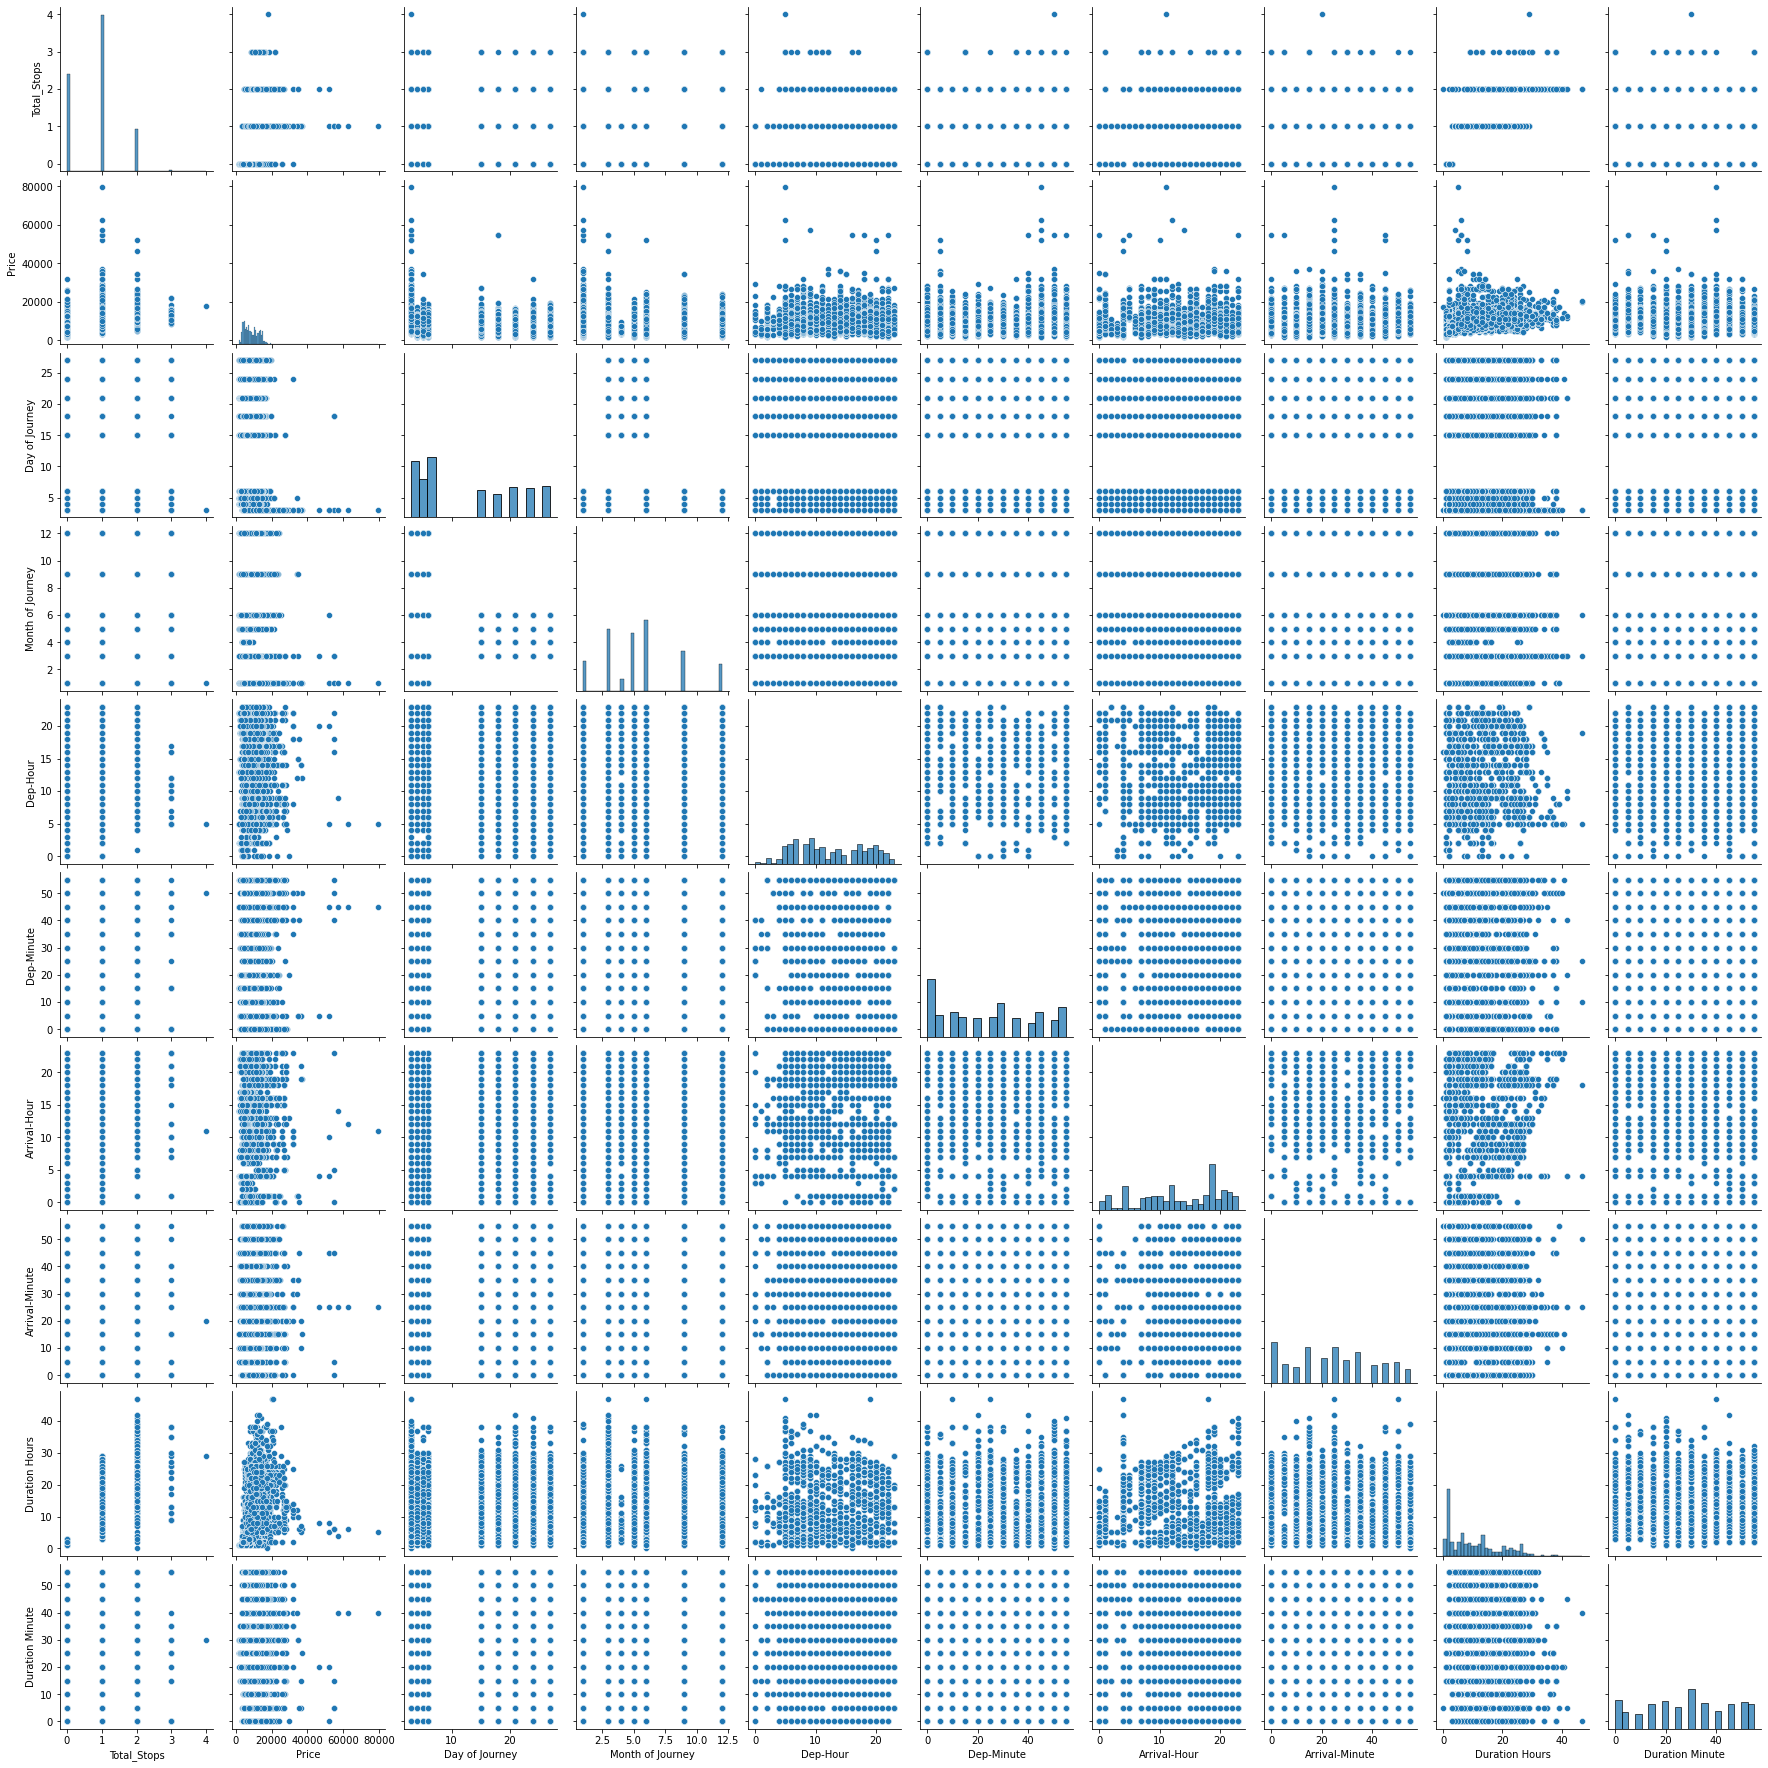

In [41]:
sns.pairplot(train)

In [42]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in train:
    if train[i].dtypes=='object':
        train[i]=Le.fit_transform(train[i])

In [43]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,3,0,5,0,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,8,7662,5,1,5,50,13,15,7,25
2,4,2,1,2,8,13882,6,9,9,25,4,25,19,0
3,3,3,0,1,8,6218,5,12,18,5,23,30,5,25
4,3,0,5,1,8,13302,3,1,16,50,21,35,4,45


In [44]:
#Additional_Info is not needed ,so removing
train=train.drop('Additional_Info',axis=1)
train.head()

,Airline,Source,Destination,Total_Stops,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,5,1,5,50,13,15,7,25
2,4,2,1,2,13882,6,9,9,25,4,25,19,0
3,3,3,0,1,6218,5,12,18,5,23,30,5,25
4,3,0,5,1,13302,3,1,16,50,21,35,4,45


<AxesSubplot:>

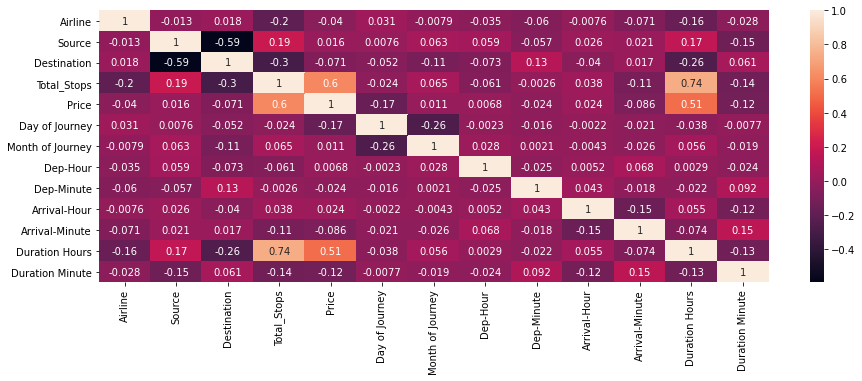

In [45]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True)

In [46]:
train.describe()

,Airline,Source,Destination,Total_Stops,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,2.352090,1.177276,1.474845,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


All the columns has 10682 counts.

The mean is greater than median in Price and Duration Hour. There is a large difference between 75th percentile and Max in Price.

In [47]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(train))
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   826,   919,   936,   946,   959,   966,   969,
         975,  1067,  1113,  1196,  1218,  1246,  1341,  1346,  1424,
        1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1665,
        1785,  1791,  1804,  1918,  2055,  2099,  2108,  2172,  2172,
        2495,  2553,  2556,  2618,  2623,  2633,  2635,  2641,  2654,
        2693,  2718,  2718,  2814,  2822,  2924,  3032,  3111,  3157,
        3220,  3257,  3317,  3400,  3457,  3496,  3535,  3568,  3584,
        3700,  3790,  3815,  3815,  3945,  3966,  4012,  4047,  4118,
        4118,  4463,  4463,  4521,  4655,  4655,  4676,  4760,  4829,
        5013,  5050,  5136,  5372,  5439,  5446,  5516,  5662,  5701,
        5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,  5856,
        5933,  5947,  5953,  5986,  5996,  6059,  6085,  6314,  6321,
        6407,  6444,  6476,  6576,  6588,  6599,  6605,  6884,  6884,
        6991,  7001

In [48]:
#Removing the outliers
trainnew=train[(z<3).all(axis=1)]
print('trainnew.shape = ',trainnew.shape)
train=trainnew

trainnew.shape =  (10488, 13)


In [49]:
dataloss=((10683-10488)/10683)*100
dataloss

1.8253299634934008

1.82 Data loss after outlier removal.

In [50]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,5,1,5,50,13,15,7,25
2,4,2,1,2,13882,6,9,9,25,4,25,19,0
3,3,3,0,1,6218,5,12,18,5,23,30,5,25
4,3,0,5,1,13302,3,1,16,50,21,35,4,45


In [51]:
# Separating dependent and independent variables

X=train.drop('Price',axis=1)
Y=train['Price']
print(X.shape)
print(Y.shape)

(10488, 12)
(10488,)


In [52]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,3.553509,Airline
1,4.778340,Source
2,2.495892,Destination
3,5.649623,Total_Stops
4,3.007034,Day of Journey
5,4.289275,Month of Journey
6,5.229483,Dep-Hour
7,2.730313,Dep-Minute
8,4.337728,Arrival-Hour
9,3.229430,Arrival-Minute


Multicollinearity not present

In [53]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[-0.41820457, -1.67521451,  2.47353579, ..., -0.88804009,
        -0.97574091,  1.27164733],
       [-1.26691385,  0.88322396, -0.97268267, ..., -0.58580215,
        -0.36738198, -0.20104952],
       [ 0.00615007,  0.03041114, -0.28343898, ...,  0.01867374,
         1.09267947, -1.67374637],
       ...,
       [ 0.00615007, -1.67521451,  0.40580471, ..., -0.2835642 ,
        -0.85406913, -1.67374637],
       [ 2.55227791, -1.67521451,  2.47353579, ..., -0.88804009,
        -0.97574091,  0.68256859],
       [-1.26691385,  0.03041114, -0.28343898, ..., -0.58580215,
        -0.24571019, -0.49558889]])

TEST DATA

In [54]:
test=pd.read_excel('Flight_Test.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [55]:
test.shape

(2671, 10)

Test dataset has 2671 rows and 10 columns

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


All the columns has 2671 non-null values.No missing values.

All the data types are of object.

In [57]:
#Checking null values present in the dataset.
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values

In [58]:
#Date_of_Journey is object need to convert to datetime

test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])
test['Day of Journey']=test['Date_of_Journey'].apply(lambda x:x.day)
test['Month of Journey']=test['Date_of_Journey'].apply(lambda x:x.month)
test['Year of Journey']=test['Date_of_Journey'].apply(lambda x:x.year)

#Converting the Dep_Time from object to datetime.
test['Dep_Time']=pd.to_datetime(test['Dep_Time'])
test['Dep-Hour']=test['Dep_Time'].apply(lambda x:x.hour)
test['Dep-Minute']=test['Dep_Time'].apply(lambda x:x.minute)

#Converting the Arrival_Time from object to datetime.
test['Arrival_Time']=pd.to_datetime(test['Arrival_Time'])
test['Arrival-Hour']=test['Arrival_Time'].apply(lambda x:x.hour)
test['Arrival-Minute']=test['Arrival_Time'].apply(lambda x:x.minute)

#Checking the unique number in Total_Stops
test['Total_Stops'].unique()
#Replacing the values in Total_Stops
test['Total_Stops']=test['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

#Seperating Duration_hour and Duration_minute from Duration

Duration=list(test['Duration'])

Duration_hour=[]
Duration_minute=[]
for i in range(len(Duration)):
    if len(Duration[i].split()) !=2:
        if 'h' in Duration[i]:
            Duration[i]=Duration[i].strip() + ' 0m'
        else:
            Duration[i]='0h' +Duration[i]
        
for i in range(len(Duration)):
    Duration_hour.append(int(Duration[i].split('h')[0]))
    Duration_minute.append(int(Duration[i].split('m')[0].split('h')[-1]))
        
#Adding Duration_hour and Duration_minute.
test['Duration Hours']=Duration_hour
test['Duration Minute']=Duration_minute

#Removing Date_of_Journey,Dep_Time,Arrival_Time and Duration
test=test.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

#Route and Total_Stops are similar, so removing one of them. There is only one year in the Year of Jouney,so removing that also.
test=test.drop(['Route','Year of Journey'],axis=1)
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,Jet Airways,Delhi,Cochin,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,No info,24,6,23,55,2,45,2,50


In [59]:
#Encoding the categorical columns
Le=LabelEncoder()
for i in test:
    if test[i].dtypes=='object':
        test[i]=Le.fit_transform(test[i])

In [60]:
#Additional_Info is not needed ,so removing
test=test.drop('Additional_Info',axis=1)
test.head()

,Airline,Source,Destination,Total_Stops,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hours,Duration Minute
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,5,12,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


In [61]:
#Finding outliers

z=np.abs(zscore(test))
threshold=3
print(np.where(z>3))

#Removing the outliers
testnew=test[(z<3).all(axis=1)]
print('testnew.shape = ',testnew.shape)
train=testnew

(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877, 1022,
       1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1918, 1945,
       2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492], dtype=int64), array([ 3,  3, 10,  3, 10,  3,  3, 10,  3,  3, 10, 10, 10, 10, 10, 10, 10,
        3, 10, 10, 10, 10,  3, 10, 10,  3,  3, 10,  3, 10], dtype=int64))
testnew.shape =  (2643, 12)


In [62]:
dataloss=((2671-2643)/2671)*100
dataloss

1.0482965181579933

1.04 Data loss after outlier removal.

# Model Building

In [63]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
ls=Lasso()
rd=Ridge()
sv=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
#Linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.4973899913226001

In [65]:
predlr=lr.predict(x_test)
print('R2 score :',r2_score(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr)))

R2 score : 0.5133253204305103
Mean squared error : 7749707.120185694
Root Mean squared error  : 2783.8295781505185


In [66]:
#SVR
sv.fit(x_train,y_train)
sv.score(x_train,y_train)

0.05672463661767846

In [67]:
predsv=sv.predict(x_test)
print('R2 score :',r2_score(y_test,predsv))
print('Mean squared error :',mean_squared_error(y_test,predsv))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predsv)))

R2 score : 0.05370135097438844
Mean squared error : 15068664.317328155
Root Mean squared error  : 3881.8377500003985


In [68]:
#Lasso
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4973892474925722

In [69]:
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : 0.5133179442390583
Mean squared error : 7749824.57713551
Root Mean squared error  : 2783.850674360159


In [70]:
#Ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4973899823152941

In [71]:
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.513322647834902
Mean squared error : 7749749.678046383
Root Mean squared error  : 2783.837221901881


In [72]:
#Decision tree
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9625419050732742

In [73]:
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.6952108896691938
Mean squared error : 4853398.8671347145
Root Mean squared error  : 2203.0430924370758


In [74]:
#Random forest
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9497241114104832

In [75]:
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.8127860921473452
Mean squared error : 2981155.6170683163
Root Mean squared error  : 1726.6023332164


In [76]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.6319220946455341

In [77]:
predad=ad.predict(x_test)
print('R2 score :',r2_score(y_test,predad))
print('Mean squared error :',mean_squared_error(y_test,predad))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predad)))

R2 score : 0.6113390527238218
Mean squared error : 6188956.682744876
Root Mean squared error  : 2487.7613797840168


In [78]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.7923305502089207

In [79]:
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.7781559120549313
Mean squared error : 3532599.45522504
Root Mean squared error  : 1879.5210707052581


Cross Validation

In [80]:
#linear
score=cross_val_score(lr,X,Y,cv=3)
print(score)
print(score.mean())

[0.4987024  0.50907513 0.488542  ]
0.4987731755017349


In [81]:
#SVR
score=cross_val_score(sv,X,Y,cv=3)
print(score)
print(score.mean())

[0.04152052 0.05020171 0.05187078]
0.047864337830480976


In [82]:
#lasso
score=cross_val_score(ls,X,Y,cv=3)
print(score)
print(score.mean())

[0.49872986 0.50903258 0.48855303]
0.49877182198875686


In [83]:
#Ridge
score=cross_val_score(rd,X,Y,cv=3)
print(score)
print(score.mean())

[0.49870525 0.50906955 0.48854552]
0.4987734397988861


In [84]:
#Decision tree
score=cross_val_score(dt,X,Y,cv=3)
print(score)
print(score.mean())

[0.70636336 0.71405611 0.67265897]
0.6976928153756171


In [85]:
#Random Forest
score=cross_val_score(rf,X,Y,cv=3)
print(score)
print(score.mean())

[0.82234401 0.82490592 0.7969853 ]
0.8147450770296016


In [86]:
#AdaBoost
score=cross_val_score(ad,X,Y,cv=3)
print(score)
print(score.mean())

[0.6145579  0.61549264 0.57642394]
0.6021581574466364


In [87]:
#GradientBoosting
score=cross_val_score(gb,X,Y,cv=3)
print(score)
print(score.mean())

[0.78084039 0.78084584 0.77298923]
0.7782251530919932


Hyperparameter Tuning

In [88]:
#DTR
grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,1),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [89]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 11, 'max_features': 'auto', 'min_samples_split': 17, 'splitter': 'best'}


In [90]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=11,max_features='auto',min_samples_split=17,splitter='best')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.8037720634743352
Mean squared error : 3124693.1486501484
Root Mean squared error  : 1767.680160167599


Text(0, 0.5, 'Predicted data')

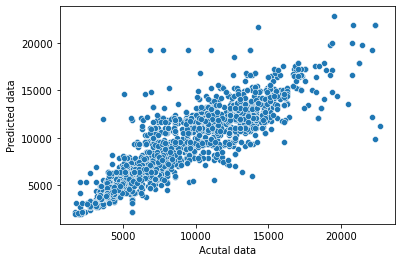

In [91]:
sns.scatterplot(x=y_test,y=preddt)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [92]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],'min_samples_split':[1,5,10,15],'min_samples_leaf':[1,5,10,15],'max_depth':range(2,20,2),'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rf,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [1, 5, 10, 15]})

In [93]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [94]:
rf=RandomForestRegressor(criterion='poisson',max_depth=18,max_features='sqrt',min_samples_leaf=1,min_samples_split=5)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.7122675161335977
Mean squared error : 4581792.66877143
Root Mean squared error  : 2140.5122444806125


Text(0, 0.5, 'Predicted data')

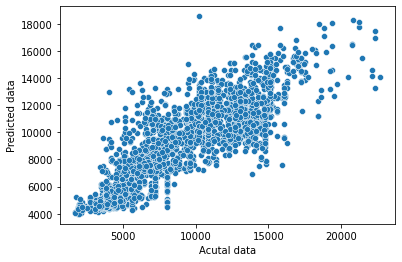

In [95]:
sns.scatterplot(x=y_test,y=predrf)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [96]:
#AdaBoost
grid_para={'n_estimators':[50,60,70,80],'loss':['linear','square','exponential'],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'random_state':[40,42,45,47,49,52]}
grid_search=GridSearchCV(estimator=ad,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 70, 80],
                         'random_state': [40, 42, 45, 47, 49, 52]})

In [97]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 70, 'random_state': 49}


In [98]:
ad=AdaBoostRegressor(learning_rate=0.1,loss='exponential',n_estimators=70,random_state=49)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('R2 score :',r2_score(y_test,predad))
print('Mean squared error :',mean_squared_error(y_test,predad))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predad)))

R2 score : 0.6390104537252115
Mean squared error : 5748323.006146619
Root Mean squared error  : 2397.566058765977


Text(0, 0.5, 'Predicted data')

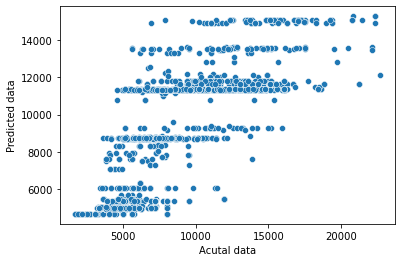

In [99]:
sns.scatterplot(x=y_test,y=predad)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [100]:
#GradientBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'max_features': ['auto', 'log2', 'sqrt']})

In [101]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 1.0, 'max_features': 'auto'}


In [102]:
gb=GradientBoostingRegressor(learning_rate=1.0,max_features='auto')
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.8142036469525595
Mean squared error : 2958582.767013858
Root Mean squared error  : 1720.0531291253355


Text(0, 0.5, 'Predicted data')

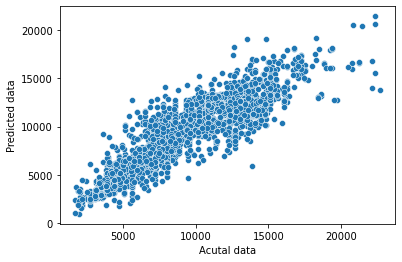

In [103]:
sns.scatterplot(x=y_test,y=predgb)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [104]:
#Decision tree
score=cross_val_score(dt,X,Y,cv=3)
print(score)
print(score.mean())

[0.79558675 0.80890487 0.78216334]
0.7955516511538319


In [105]:
#GradientBoosting
score=cross_val_score(gb,X,Y,cv=3)
print(score)
print(score.mean())

[0.81283442 0.8176429  0.81133614]
0.8139378184598751


The Gradient Boosting Regressor model R2 score and cross validation socre is 81.3%.

Gradient Boosting Regressor gives the best result.

In [106]:
import pickle
filename="Flight Price.pkl"
pickle.dump(gb,open(filename, 'wb'))

Conclusion

In [107]:
model=pickle.load(open("Flight Price.pkl",'rb'))
result=model.score(x_test,y_test)
print('The R2 score of the model : ',result*100)

The R2 score of the model :  81.42036469525596


In [108]:
Accuracy=pd.DataFrame([model.predict(x_test),predgb],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621
Predicted,11433.755047,5124.177467,11793.422006,12951.670591,11886.909563,3047.229841,11904.526719,7016.170355,15541.091117,12239.978065,...,2512.068489,4060.12247,6821.490665,16036.025456,3881.136382,6412.854138,6470.431047,7918.796176,5218.401008,10575.063765
Original,11433.755047,5124.177467,11793.422006,12951.670591,11886.909563,3047.229841,11904.526719,7016.170355,15541.091117,12239.978065,...,2512.068489,4060.12247,6821.490665,16036.025456,3881.136382,6412.854138,6470.431047,7918.796176,5218.401008,10575.063765
